#12주차 과제
*   학번 : 2314013
*   이름 : 우채아



DBSCAN(Density-Based Spatial Clustering of Application with Noise)은 밀도를 기준으로 서로 가까운 데이터 포인트를 그룹화하는 클러스터링 알고리즘이다. DBSCAN을 활용하여 데이터를 군집화하는 방법에 대해 아래 물음에 답하시오.(온라인강의에서 다루지 않은 부분에 대해서도 오픈소스와 구글링을 통해 해답을 찾을 수 있음)

# 1. 합성 데이터 생성:
다양한 밀도로 합성 데이터 세트를 만드시오. scikit-learn 라이브러리를 사용하여 다양한 모양과 크기의 클러스터를 생성할 수 있다. 이때 어떤 클러스터에도 속하지 않는 일부 노이즈 포인트를 포함하여 생성하시오.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X, y = make_blobs(n_samples = 100)

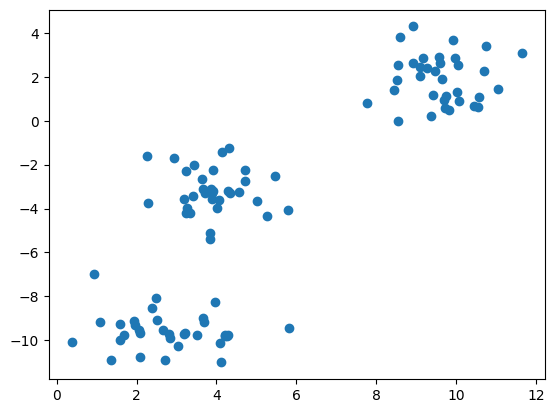

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data=X, columns=["Feature1", "Feature2"])

In [ ]:
df

,Feature1,Feature2
0,4.711959,-2.245601
1,1.955211,-9.300234
2,10.540546,0.609800
3,4.289928,-3.180103
4,8.521361,1.854623
...,...,...
95,3.235235,-4.190263
96,5.814505,-9.427516
97,10.749054,3.384095
98,2.945951,-1.692031


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/data/dbscan_data.csv', encoding = 'UTF=8')

#2. DBSCAN 구현
DBSCAN 알고리즘을 구현하는 파이썬 코드를 작성하시오. 필요한 경우 함수로 구현하여 프로그램을 구현할 경우 가점을 부여함, scikit-learn 라이브러리를 사용하면 쉽게 구현할 수 있음

In [123]:
from sklearn.cluster import DBSCAN

In [ ]:
def dbscan(eps, min_samples):
  model = DBSCAN(eps=eps, metric= 'euclidean', min_samples=min_samples)
  global pred
  pred = model.fit_predict(data)
  plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis', s=50)
  plt.title("DBSCAN Clustering Results")
  plt.show()

#3. 합성 데이터 클러스터링
2번에서 작성한 DBSCAN 코드를 1번에서 생성한 합성데이터세트에 적용시오. 이때 엡실론(인접 지점을 검색하는 반경) 및 밀집 영역을 형성하는 데 필요한 최소 지점과 같은 알고리즘 매개변수를 의 다양한 값으로 변화시키면서 모델을 평가하시오.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/data/dbscan_data.csv" , index_col=0)

In [ ]:
data.head()

,Feature1,Feature2
0,4.711959,-2.245601
1,1.955211,-9.300234
2,10.540546,0.609800
3,4.289928,-3.180103
4,8.521361,1.854623


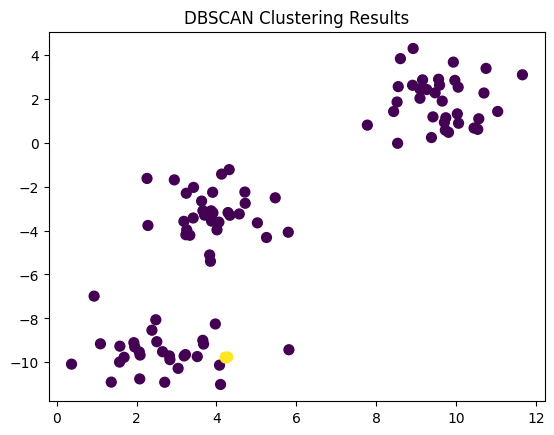

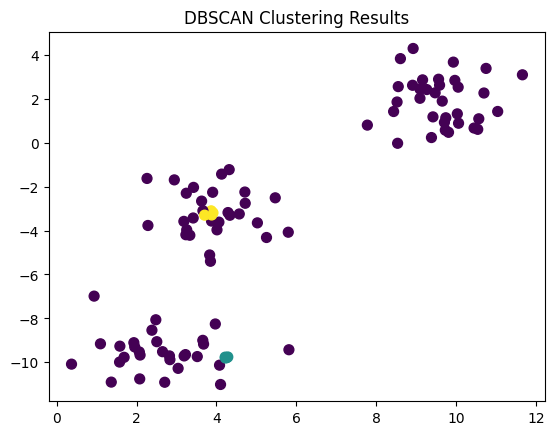

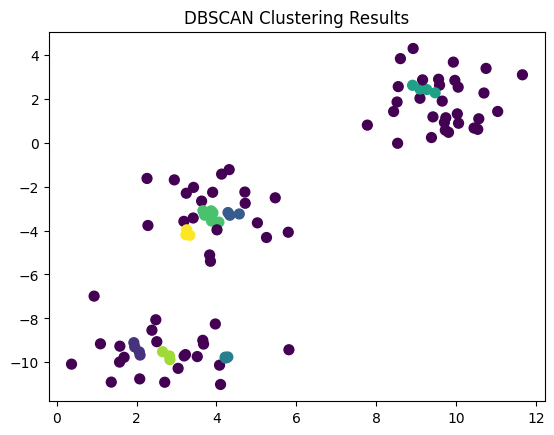

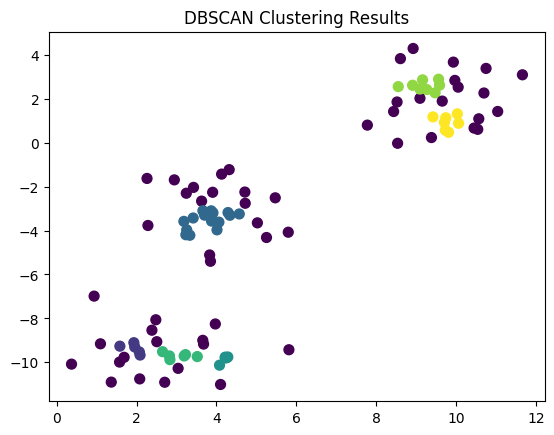

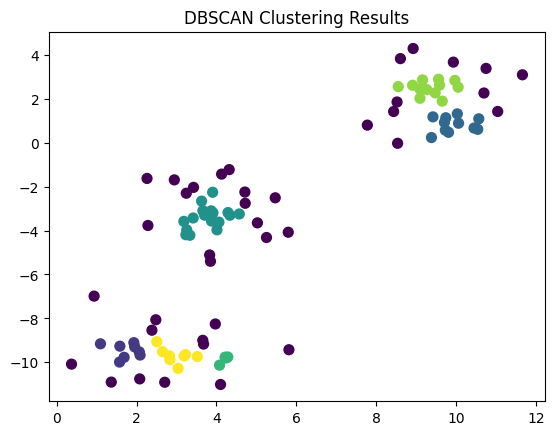

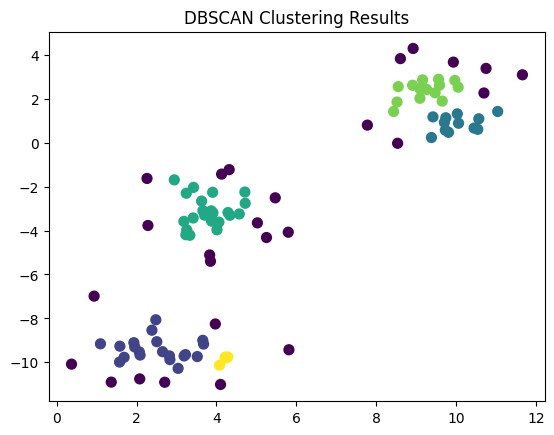

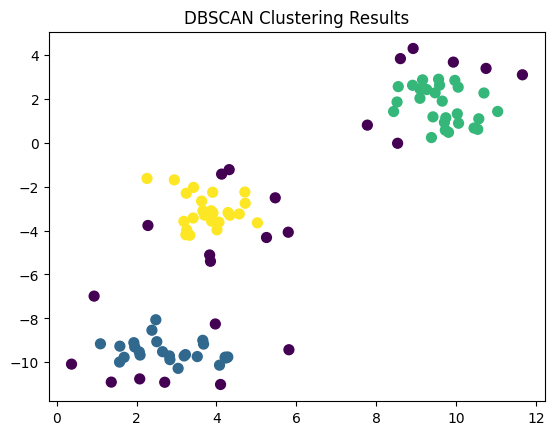

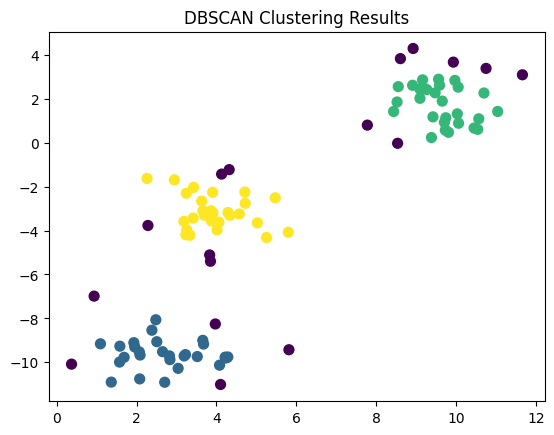

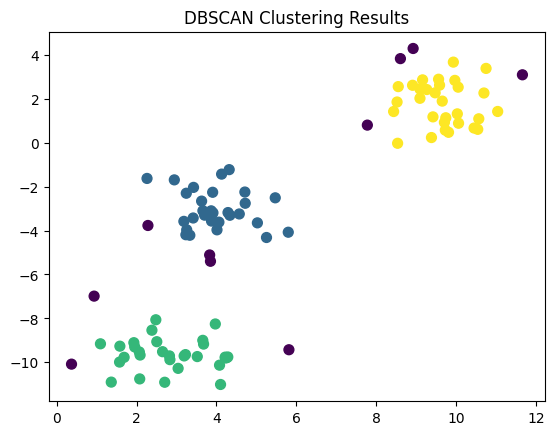

In [ ]:
for x in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:  # 엡실론 변화시키기
 dbscan(eps=x, min_samples = 3)

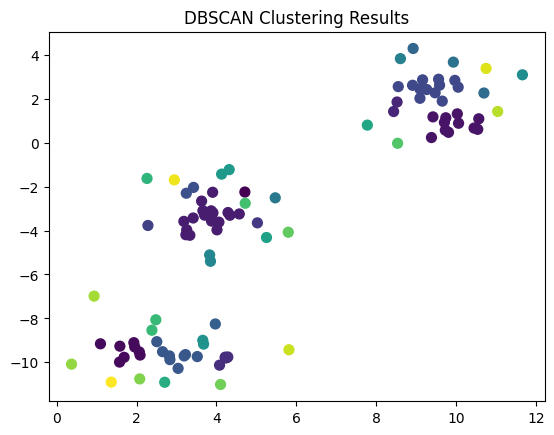

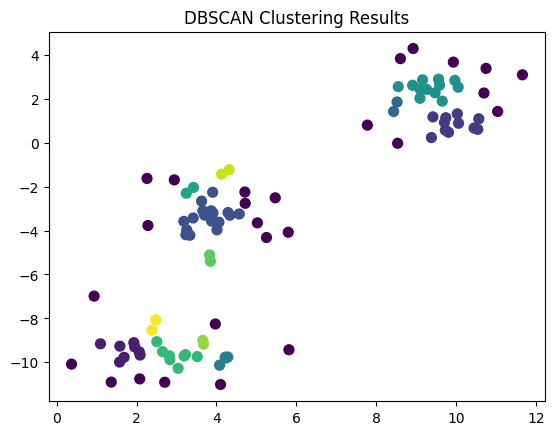

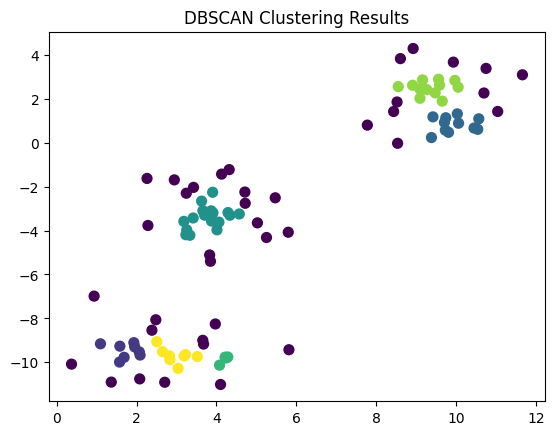

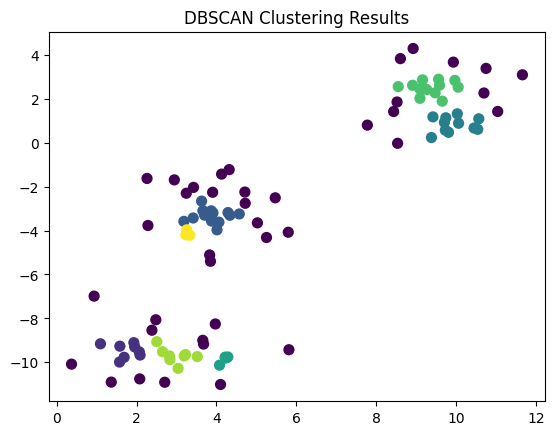

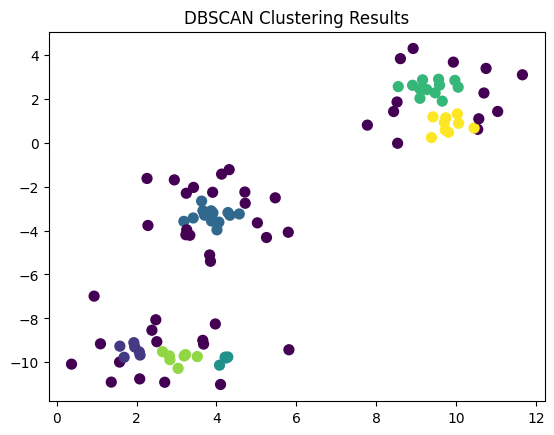

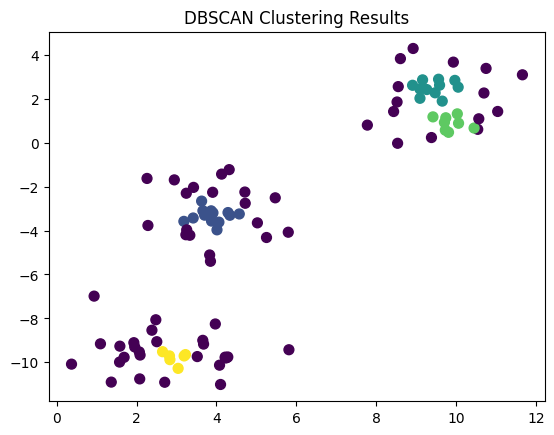

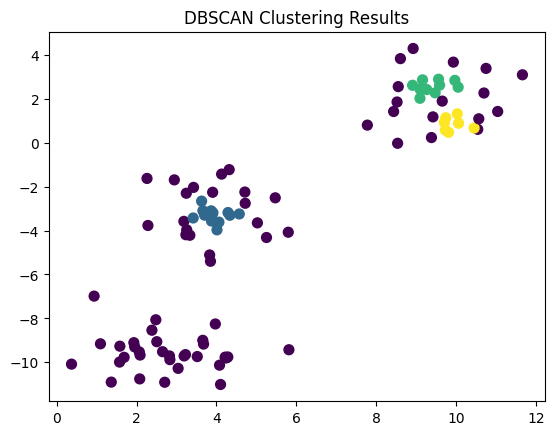

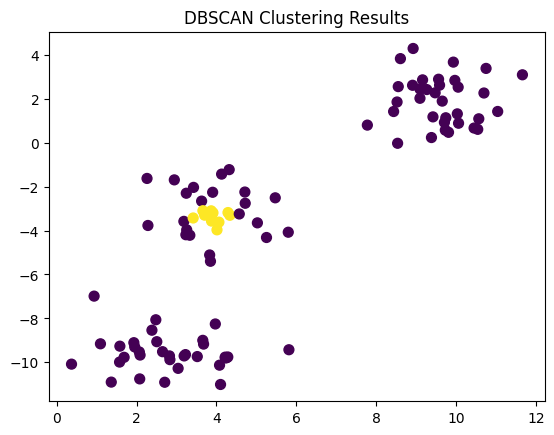

In [ ]:
for x in range(1,9):  # 필요한 최소 지점 개수 변화시키기
 dbscan(eps=0.5, min_samples = x)

#4. 결과의 시각화
합성데이터세트를 시각화함수를 사용하여 시각화하고, DBSCAN을 통해 할당된 클러스터를 기반으로 점의 색상을 지정하며, 노이즈 지점이 있는 경우 이를 다른 색이나 모양으로 구별하시오.

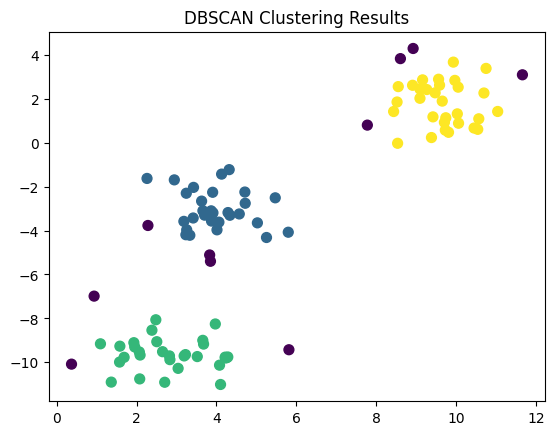

In [ ]:
dbscan(eps=0.9, min_samples = 3)

#5. 결과에 대한 평가
DBSCAN으로 형성된 클러스터를 분석하고, 매개변수를 변경하는 것이 클러스터링 결과에 어떠한 영향을 미치는지 평가하시오. 노이즈 포인트는 어떤 의미를 가지는지 설명하시오.

밀집 영역을 형성하는 데 필요한 최소 지점 (min_samples) 을 크게 할 수록 하나의 군집 안의 데이터 개수가 많아져 결과적으로 군집의 개수가 적어지는 것을 볼 수 있다.

엡실론 (eps) 을 크게 할수록 군집의 개수가 많아지는 것을 볼 수 있다.

노이즈 포인트는 어느 군집에도 속하지 않는 데이터를 의미한다.


#6. 결과 요약 및 개인 평가
실험을 바탕으로 DBSCAN의 장점과 한계에 대해 자신의 의견을 기술하시오. 다른 클러스터링 알고리즘에 비해 DBSCAN이 어떤 경우에 적합한지도 같이 서술하시오.

서술형 답변은 아래에 작성하세요.
==========================================================




DBSCAN의 장점

 - 밀도를 기반으로 군집화하기 때문에 모여있는 데이터에만 집중해서 추출할 수 있다.
 - 군집분석 (예: K-Means) 에서는 군집 수를 임의적으로 지정해야 하는 반면, DBSCAN 은 클러스터의 수를 정하지 않아도 된다.
 - 이상치나 노이즈가 존재하는 현실적인 데이터에 매우 적합하다.
 - noise point를 통하여 outlier 검출이 가능하여 이상거래 및 이상징후 탐지 분야에 활용도가 높다.


DBSCAN의 한계

 - 케이스 간 거리 계산 시 시작되는 데이터의 순서에 따라 결과가 달라질 수 있다.
 - 고차원의 경우 거리측정법에 따라 차원의 저주에 걸려 적절한 엡실런을 찾는 데 어려울 수 있다.
 - 다양한 밀도를 다루기는 어렵다.
 - 파라미터에 민감하여 데이터에 맞는 파라미터를 결정하기 어렵다.

따라서, DBSCAN 알고리즘은
데이터에 노이즈 포인트가 존재하고, 분류해야 할 군집 개수가 정해져 있지 않은 현실 세계의 데이터에 적합한 알고리즘이다.